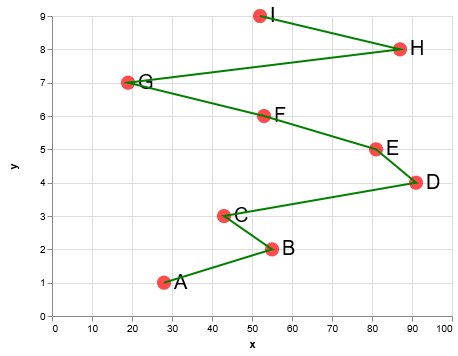

In [71]:
import altair as alt
import pandas as pd

data = pd.DataFrame({
    'a': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'],
    'x': [28, 55, 43, 91, 81, 53, 19, 87, 52],
    'y':[1,2,3,4,5,6,7,8,9]
})

# circle will be sqrt(200)
points = alt.Chart(data).mark_circle(color='red', size=200).encode(
    y='y:Q',
    x='x:Q',
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=10
).encode(
    text='a',
    y='y:Q',
    x='x:Q',
    size=alt.value(20),
)

line = alt.Chart(data).mark_line(color='green'). encode(
    y='y:Q',
    x='x:Q', 
    order='y:Q'
)

merge = text + points + line

merge

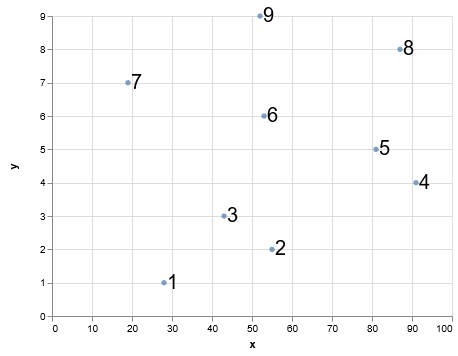

In [72]:
import altair as alt
import pandas as pd

data = pd.DataFrame({
    'a': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'],
    'x': [28, 55, 43, 91, 81, 53, 19, 87, 52],
    'y':[1,2,3,4,5,6,7,8,9]
})


data['value'] = data['y']


points = alt.Chart(data).mark_circle().encode(
    y='y:Q',
    x='x:Q'
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3
).encode(
    text='value',
    y='y:Q',
    x='x:Q',
    size=alt.value(20),
)

points + text

In [73]:
tax='../data/taxstats2014individual08taxableincomebypostcode.xlsx'

atodf = pd.read_excel(tax, 
                        sheet_name='Table 8',\
                        skiprows=2)

In [74]:
atodf.head(1)


,State/ Territory,Postcode2,Individuals 2003–04 no.,Median3 taxable income 2003–04 $,Mean3 taxable income 2003–04 $,Individuals 2013–14 no.,Median3 taxable income 2013–14 $,Mean3 taxable income 2013–14 $,Median growth %,Mean growth %
0,ACT,2600,5692,42327,55819,5712,66815,94265,58,69


In [75]:
atodf.columns

Index(['State/\nTerritory', 'Postcode2', 'Individuals 2003–04\nno.',
       'Median3 taxable income 2003–04\n$', 'Mean3 taxable income 2003–04\n$',
       'Individuals 2013–14\nno.', 'Median3 taxable income 2013–14\n$',
       'Mean3 taxable income 2013–14\n$', 'Median growth\n%',
       'Mean growth\n%'],
      dtype='object')

In [76]:
names = ['State', 
         'Postcode2', 
        'Count', 
        'Median',
        'Mean']
     

In [77]:
ato2 = atodf[['State/\nTerritory', 'Postcode2', 
       'Individuals 2013–14\nno.', 'Median3 taxable income 2013–14\n$',
       'Mean3 taxable income 2013–14\n$']  ]


In [78]:
ato2.head(1)

,State/ Territory,Postcode2,Individuals 2013–14 no.,Median3 taxable income 2013–14 $,Mean3 taxable income 2013–14 $
0,ACT,2600,5712,66815,94265


In [79]:
ato2.columns = names

In [80]:
ato2.head(1)

,State,Postcode2,Count,Median,Mean
0,ACT,2600,5712,66815,94265


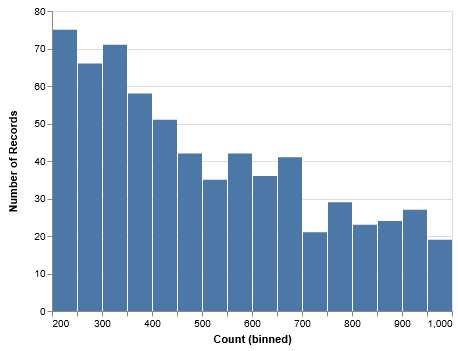

In [81]:
import altair as alt
import pandas as pd

c1 = alt.Chart(ato2[ato2['Count']<1000]).mark_bar(
).encode(
    x=alt.X('Count:Q', bin=alt.Bin(maxbins=20,) ),
    y=alt.Y('count()'),
)

c1

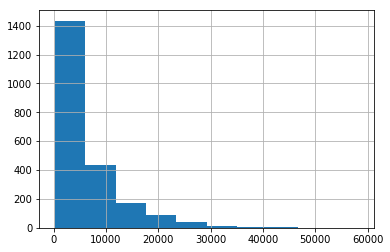

In [82]:
ato2['Count'].hist()

In [83]:
%matplotlib inline

In [84]:
ato2[ato2['Count']==0].head()

,State,Postcode2,Count,Median,Mean


In [85]:
c2 = alt.Chart(ato2).mark_circle(opacity=0.5).encode(
    x='Mean:Q',
    y='Median:Q',
    size='Count',
    color='Mean:Q',
    tooltip='Postcode2')

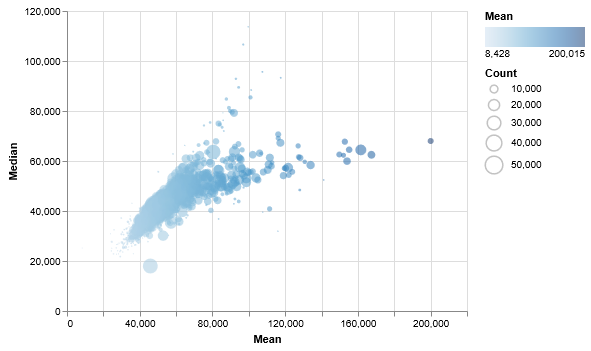

In [86]:
c2

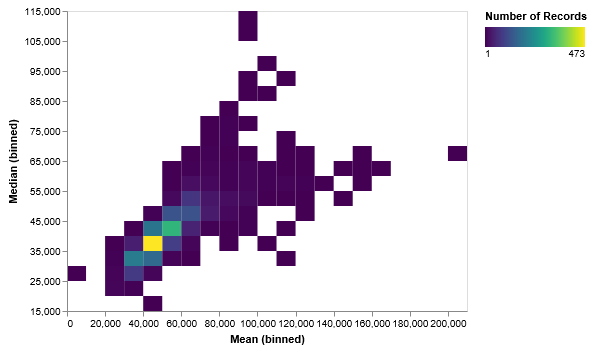

In [87]:
c3=alt.Chart(ato2).mark_rect().encode(
    alt.X('Mean:Q', bin=alt.Bin(maxbins=20)),
    alt.Y('Median:Q', bin=alt.Bin(maxbins=20)),
    color=alt.Color('count():Q', scale=alt.Scale(scheme='viridis'),),
    tooltip = 'count():Q'
)
c3

In [88]:
ato2.iloc[0]['Postcode2']

2600

In [128]:
ato2=ato2.copy()
ato2['State'] = ato2['Postcode2']//1000

ato2 = ato2[ato2.notnull()].copy()
ato2 = alt.utils.core.sanitize_dataframe(ato2)

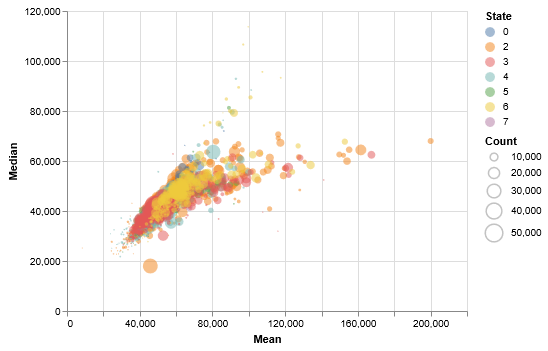

In [129]:
c2 = alt.Chart(ato2).mark_circle(opacity=0.5).encode(
    x='Mean:Q',
    y='Median:Q',
    size='Count',
    color='State:N',
    tooltip='Postcode2')
c2

113687
58380


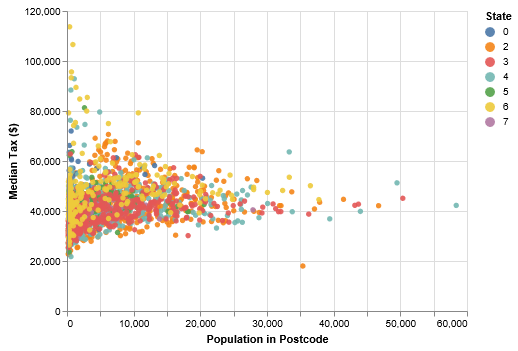

In [141]:
medmax = ato2['Median'].max()
print(medmax)
popmax = ato2['Count'].max()
print(popmax)

xscale = alt.Scale(domain=[0,popmax])
yscale = alt.Scale(domain=[0,medmax])

c2 = alt.Chart(ato2).mark_circle(opacity=0.9).encode(
    x=alt.X('Count:Q', axis=alt.Axis(title='Population in Postcode'), scale=xscale),
    y=alt.Y('Median:Q', axis=alt.Axis(title='Median Tax ($)'), scale=yscale),
    color='State:N',
    tooltip='Postcode2')
c2

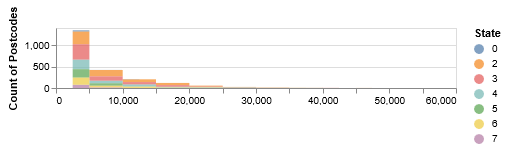

In [142]:
top = alt.Chart(ato2).mark_area(interpolate='step', opacity=0.69).encode(    
    alt.X('Count:Q', bin = alt.Bin(maxbins=20, extent=xscale.domain), stack=None, axis=alt.Axis(title=''),   ),
    alt.Y('count()', stack='zero', axis=alt.Axis(title='Count of Postcodes')),
    alt.Color('State:N'),
).properties(height=60)
top

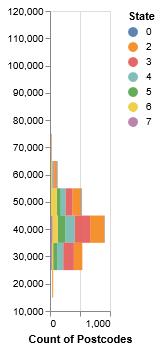

In [148]:
side = alt.Chart(ato2).mark_area(interpolate='step', opacity=0.9).encode(    
    alt.Y('Median:Q', 
          bin = alt.Bin(maxbins=20, extent=yscale.domain), 
          stack=None, 
          axis=alt.Axis(title='', ),
          scale=alt.Scale(domain=[0,medmax])),
    alt.X('count()', stack='zero', axis=alt.Axis(title='Count of Postcodes')),
    alt.Color('State:N'),
).properties(width=60)
side

In [147]:
yscale.domain

[0, 113687]

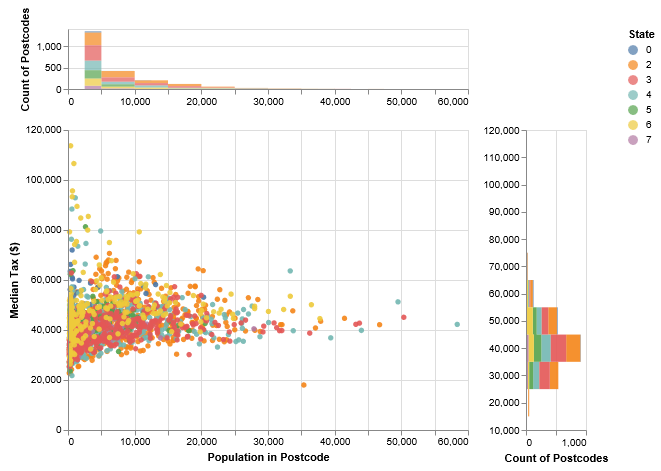

In [139]:
top & ( c2 | side)

In [96]:
h1+

2203

In [160]:
import altair as alt
from vega_datasets import data

iris = data.iris()

xscale = alt.Scale(domain=(0, 8.0))
yscale = alt.Scale(domain=(0, 4.55))

area_args = {'opacity': .3, 'interpolate': 'step'}
blank_axis = alt.Axis(title='')

points = alt.Chart(iris).mark_circle().encode(
    alt.X('sepalLength', scale=xscale),
    alt.Y('sepalWidth', scale=yscale),
    color='species',
)

top_hist = alt.Chart(iris).mark_area(**area_args).encode(
    alt.X('sepalLength:Q',
          # when using bins, the axis scale is set through
          # the bin extent, so we do not specify the scale here
          # (which would be ignored anyway)
          bin=alt.Bin(maxbins=20, extent=xscale.domain),
          stack=None,
          axis=blank_axis,
         ),
    alt.Y('count()', stack=None, axis=blank_axis),
    alt.Color('species:N'),
).properties(height=60)

right_hist = alt.Chart(iris).mark_area(**area_args).encode(
    alt.Y('sepalWidth:Q',
          bin=alt.Bin(maxbins=20, extent=yscale.domain),
          stack=None,
          axis=blank_axis,
         ),
    alt.X('count()', stack=None, axis=blank_axis),
    alt.Color('species:N'),
).properties(width=60)

cz = top_hist & (points | right_hist)

In [161]:
cz.save('BinBug.png')

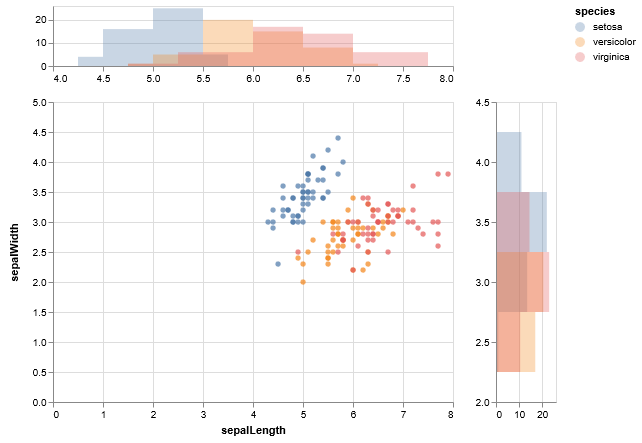

In [162]:
cz

In [163]:
print(alt.__version__)

2.1.0


In [164]:
import selenium
print(selenium.__version__)

3.12.0
